In [1]:
#importing libraries
import tensorflow as tf
import numpy as np

In [2]:
#setting the parameter
width = 224
height = 224
batch_size = 32
data = r"dataset"

In [3]:
#for training
training = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [5]:
#for validation
validation=tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(height,width),
    batch_size=batch_size)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [6]:
#targets
targets=training.class_names
targets

['with_mask', 'without_mask']

In [8]:
#seeing the info the training data
print(training)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


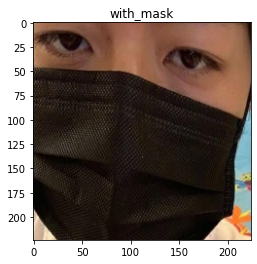

In [14]:
#seeing the data in the training set
import matplotlib.pyplot as plt
for images,lables in training.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(targets[lables[1]])
    plt.show()

In [15]:
#loading the model
from tensorflow.keras.applications import MobileNetV2

In [16]:
#initiating the model
model=MobileNetV2(weights='imagenet')

14540800/14536120 [==============================] - 2s 0us/step


In [17]:
#compiling the model
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [18]:
#summary of the model
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [22]:
#training the model
face_mask_model=model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3
81/81 [==============================] - 48s 585ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.3110 - val_accuracy: 0.9521
Epoch 2/3
81/81 [==============================] - 48s 588ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1010 - val_accuracy: 0.9874
Epoch 3/3
81/81 [==============================] - 49s 601ms/step - loss: 2.0581e-04 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9901


In [27]:
#loading the image
img=tf.keras.preprocessing.image.load_img(r"C:/Users/ansar/Downloads/photo2021-01-11 20_11_54/photo/photo_1.jpg",
                                          target_size=(height,width))
#convert to array
image_array=tf.keras.preprocessing.image.img_to_array(img)

#expanding the dimensions to fit in the model
image_array=tf.expand_dims(image_array,0)

#checking the shape of the image
image_array.shape

TensorShape([1, 224, 224, 3])

In [28]:
#predicting the model on new dataset
predictions=model.predict(image_array)

#using softmax to get the predictions result
result=tf.nn.softmax(predictions[0])

In [30]:
print(targets[np.argmax(result)],100*np.max(result))

without_mask 0.2713618101552129


In [31]:
#saving the model
model.save('face_mask.model',save_format='h5')